<a href="https://colab.research.google.com/github/AkshayRai20/Projects1/blob/main/Akshay_Team_6_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Structure**
1. Background
2. Introduction to the data
3. Assumptions made
4. The four dimensions we have explored
5. Codes 
6. Conclusions


**Background**

We are living in unprecedented times. Every doomsayer out there is predicting the end of the hospitality industry, which in recent weeks has shown immense resilience. Case in point, employment in U.S. leisure and hospitality segment increased by 271K in October with the segment adding 4.8 million jobs since April. However, employment in the industry is down by 3.5 million since February.

Ergo, hospitality is down, but not out. 

The primary driver of this trend is humans are social animals and animals love to roam. With the advent of the travel apps and websites, booking a nice place to stay takes only a click. A win-win for all the three entities involved, the customer, the facilitator and the hotel owner. 

This is a double-edged sword as it is a level playing field for customers and hotel owners. For the customers, there is competition to book a good place while for hotel owners, cancellations are bound to happen owing to the customer finding a 'better' place. So the smart customer needs to do his research to get his booking and a good deal at that while the hotel owner needs to do his research and market to the right customer, hire the right amount of labor and optimize his operating costs while also having a reasonable occupancy rate. And that brings us here. 

We have a dataset spanning over three years of bookings. The goal is to extract insights that will benefit the XXXXXXX. The XXXXXX, of course, will need to do 
his own research. 

**Introduction to the data**

1. 'Hotel': Denotes the type of hotel - Resort hotel or city hotel
2. 'Canceled': Denoted by '1' if booking was cancelled or '0' otherwise 3. 3. 3. 'Lead Time': Period between time of booking and checkin (considered in hours here)
4. 'Market Segment': The channel used for booking - 'Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Complementary', 'Groups', 'Undefined', 'Aviation'

**Assumptions Box**
1. Rows where the ADR reads zero but the status reads 'check-out' have been ignored

2. Rows where the number of people sums up to zero, including adults, babies and children have not been considered

3. ADR has been kept flat even for larger groups for simplicity

4. Market segments are considered distribution channels



# The Four Dimensions 

NOTE: Codes might not follow the sequence of questions as the final set is still being finalized


**Bookings**
1. What is the percentage of booking for each year?
2. Most booked accomodation type?
3. Distribution of ADR?
4. How much do guests pay for a room per night?
5. How long do people stay at the hotels
6. Bookings by market segment?
7. What do the weekend vs. weekday look like for resort hotels?
8. Does parking have an impact on bookings for resort hotels?

**Cancellations**
1. How many booking were cancelled?
2. Effect of lead time on cancellations?
3. Effect of deposit type on cancellations?
4. Effect of ADR on cancellations?

**Demography**
1. From which country most guest are coming?
2. Which country brings in the most revenue?

**Seasonality**
1. Which month has the least traffic?
2. How does the price per night vary over the year?
3. Which month have the highest number of cancelations?

**Others**
1. Which category has the highest number of special requests?
2. Does children have an impact on the number of special requests made?








**Preparing and exploration of data**


In [51]:
#Initialization##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("/content/drive/My Drive/Cohort Aravali/CohortAravali-201005-153433.zip (Unzipped Files)/AlmaBetter/Module 2/Week 1/hotel_bookings.csv")

Text(0, 0.5, 'Count')

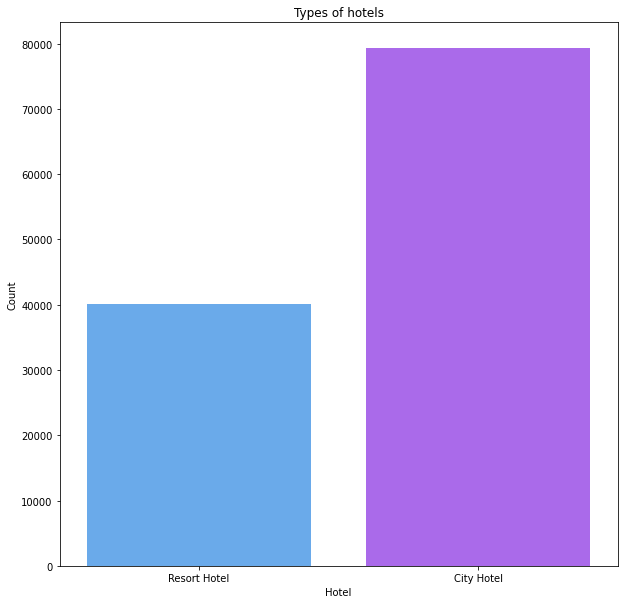

In [50]:
##Types of hotels##
plt.figure(figsize=(10,10))
sns.countplot(x='hotel', data = df, palette='cool')
plt.title('Types of hotels')
plt.xlabel('Hotel')
plt.ylabel('Count')

df.head(3)

In [6]:
###Checking for relation between 'is_cancelled' and 'reservation_status'###
df[['is_canceled','reservation_status']][0:150] 

,is_canceled,reservation_status
0,0,Check-Out
1,0,Check-Out
2,0,Check-Out
3,0,Check-Out
4,0,Check-Out
...,...,...
145,0,Check-Out
146,0,Check-Out
147,0,Check-Out
148,1,Canceled


In [7]:
###Countries###
df['country'].unique() 

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [52]:
#Adding total adults, children and babies as members for ease of analysis
df['total_members'] = df['adults']+df['children']+df['babies']

In [59]:
#Adding total weekend nights and weekday nights as total nights for ease of analysis
df['total_nights'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

In [60]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_members,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1


In [134]:
#Removing all cancelled bookings for ease of analysis
no_cancel = df[df.is_canceled==0]
no_cancel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_members,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0,7


In [24]:
#Fill NaNS with the most repeated country
df['country'].fillna(df['country'].mode())

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [8]:
##Types of meals##
df['meal'].unique()  

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [9]:
##Different market segments##
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [10]:
##Different distribution channels##
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [11]:
##Values of repeated guests##
df['is_repeated_guest'].unique()

array([0, 1])

In [44]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [13]:
##Different types of rooms##
df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [14]:
###Checking for relation between ADR and room types###
df[['reserved_room_type','assigned_room_type','adr']] 

,reserved_room_type,assigned_room_type,adr
0,C,C,0.00
1,C,C,0.00
2,A,C,75.00
3,A,A,75.00
4,A,A,98.00
...,...,...,...
119385,A,A,96.14
119386,E,E,225.43
119387,D,D,157.71
119388,A,A,104.40


In [15]:
###Checking for relation between agents and companies####
df[['agent','company','market_segment']]

,agent,company,market_segment
0,NaN,NaN,Direct
1,NaN,NaN,Direct
2,NaN,NaN,Direct
3,304.0,NaN,Corporate
4,240.0,NaN,Online TA
...,...,...,...
119385,394.0,NaN,Offline TA/TO
119386,9.0,NaN,Online TA
119387,9.0,NaN,Online TA
119388,89.0,NaN,Online TA


In [16]:
###Checking for relation between kids and special requests####
df[['babies','children','total_of_special_requests']]  

,babies,children,total_of_special_requests
0,0,0.0,0
1,0,0.0,0
2,0,0.0,0
3,0,0.0,0
4,0,0.0,1
...,...,...,...
119385,0,0.0,0
119386,0,0.0,2
119387,0,0.0,4
119388,0,0.0,0


In [17]:
df.iloc[119387]

hotel                             City Hotel
is_canceled                                0
lead_time                                 34
arrival_date_year                       2017
arrival_date_month                    August
arrival_date_week_number                  35
arrival_date_day_of_month                 31
stays_in_weekend_nights                    2
stays_in_week_nights                       5
adults                                     2
children                                   0
babies                                     0
meal                                      BB
country                                  DEU
market_segment                     Online TA
distribution_channel                   TA/TO
is_repeated_guest                          0
previous_cancellations                     0
previous_bookings_not_canceled             0
reserved_room_type                         D
assigned_room_type                         D
booking_changes                            0
deposit_ty

In [18]:
###Checking for null values in the dataframe###
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [140]:
#Removal of null values#
new_df=df.dropna(subset=['children', 'adults','babies'])
new_df1=new_df[new_df.is_canceled==0]

In [73]:
#Company has the highest null values. To be removed
new_df(drop(['company'],axis=1))

NameError: ignored

1. How many bookings were cancelled? and cancellation factor over the years?

In [33]:
##Hotel cancellation over two years##
grouped=new_df.groupby('arrival_date_year')
total_cancelled=grouped['is_canceled'].agg(np.count_nonzero)

total_number_of_bookings=grouped['is_canceled'].count()
#Total bookings
total_number_of_bookings

arrival_date_year
2015    21992
2016    56707
2017    40687
Name: is_canceled, dtype: int64

In [35]:
total_cancelled
#Total cancellations

arrival_date_year
2015     8138
2016    20337
2017    15745
Name: is_canceled, dtype: int64

In [ ]:
new_df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
sns.set_context('paper')

In [ ]:
yr_percent_df = (new_df['arrival_date_year'].value_counts(normalize=True).mul(100).reset_index()).rename(columns ={'index':'Year','arrival_date_year':'booking_percent'})

In [ ]:
yr_percent_df

,Year,booking_percent
0,2016,47.498869
1,2017,34.080210
2,2015,18.420920


In [ ]:
new_df.corr().loc['children','total_of_special_requests']

0.08174482206809368

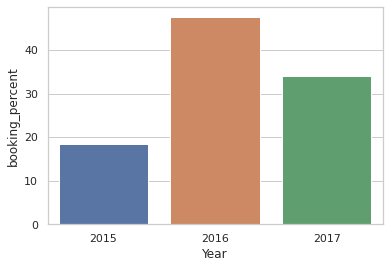

In [ ]:
ax = sns.barplot(x="Year", y="booking_percent", data=yr_percent_df)

In [37]:
cancel_correlation = df.corr()["is_canceled"]
cancel_correlation

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005048
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.083114
company                          -0.020642
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

3. Correlation between no. of children and special request

In [ ]:
new_df.corr().loc['children','total_of_special_requests']

0.08174482206809368

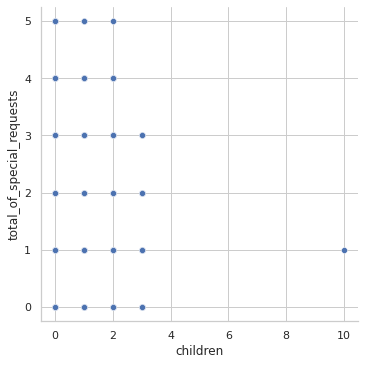

In [ ]:
sns.relplot(x="children", y="total_of_special_requests", data=new_df)

# 4. From which country most guests are coming?

In [ ]:
top10_countries = new_df[new_df['is_canceled']==0]['country'].value_counts()[0:10]
top10_countries_new = top10_countries.reset_index().rename(columns = {'index':'country','country':'number_of_bookings'})
top10_countries_new

,country,number_of_bookings
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
5,IRL,2543
6,ITA,2433
7,BEL,1868
8,NLD,1717
9,USA,1596


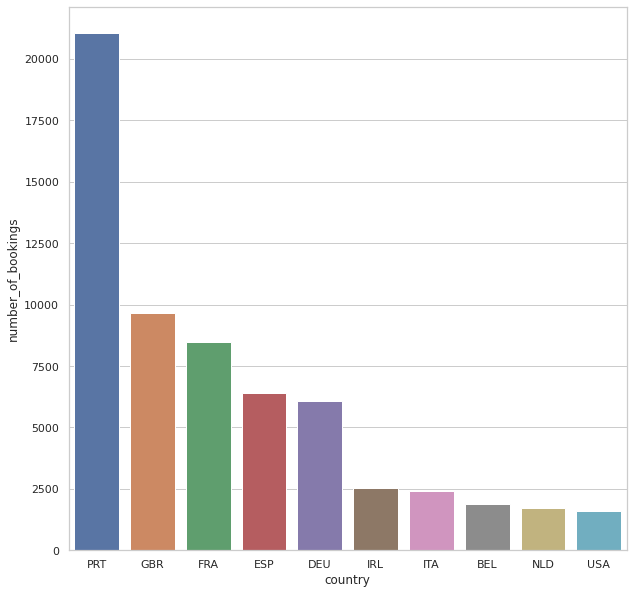

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x="country", y="number_of_bookings", data=top10_countries_new)

5. Months with least traffic and break ##Grouped bar##

In [ ]:
month_df = new_df[new_df['is_canceled']==0]['arrival_date_month'].value_counts()[0:10].reset_index().rename(columns = {'index':'month','arrival_date_month':'number_of_bookings'})
month_df

,month,number_of_bookings
0,August,8638
1,July,7919
2,May,7114
3,October,6914
4,March,6645
5,April,6565
6,June,6404
7,September,6392
8,February,5372
9,November,4672


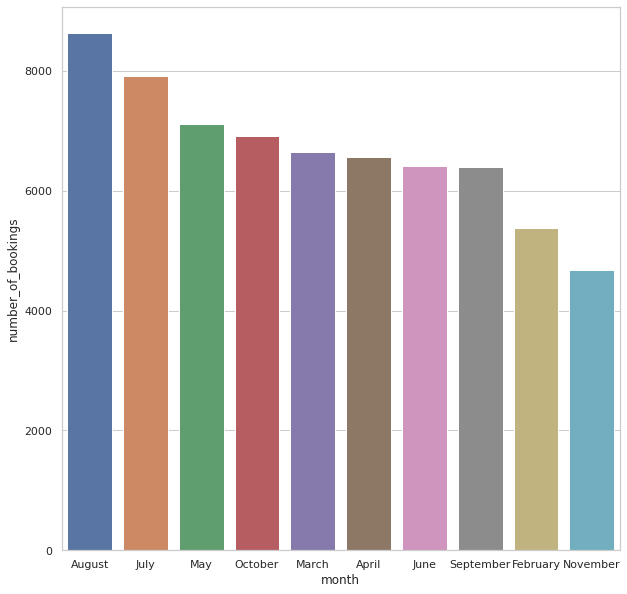

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x="month", y="number_of_bookings", data = month_df)

In [72]:
month_df_hotel_type = new_df[new_df['is_canceled']==0].groupby(['arrival_date_month','hotel'])['hotel'].count().unstack()
month_df_hotel_type

hotel,City Hotel,Resort Hotel
arrival_date_month,,
April,4015,2550
August,5381,3257
December,2392,2017
February,3064,2308
January,2254,1868
July,4782,3137
June,4366,2038
March,4072,2573
May,4579,2535


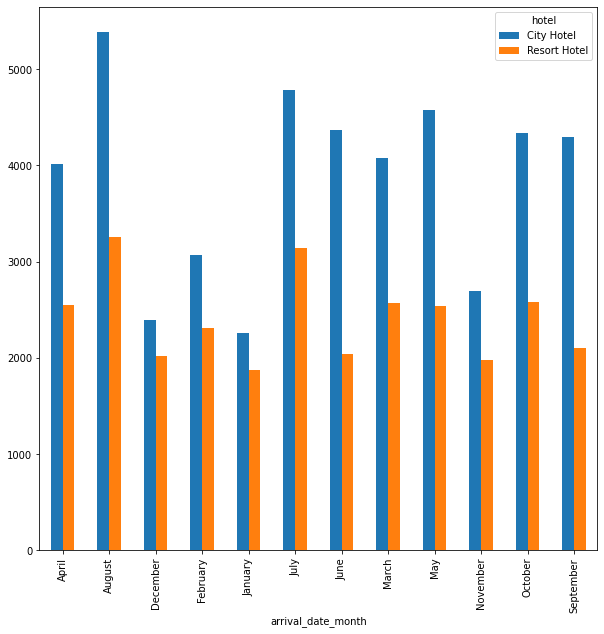

In [74]:
ax = month_df_hotel_type.plot.bar(figsize = (10,10),fontsize = 10)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


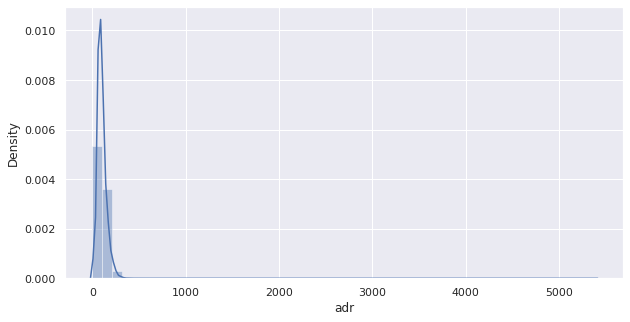

In [ ]:
#Distribution of ADR to check for outliers ##Remove cancelled##
plt.figure(figsize=(10,5))
ax = sns.distplot(new_df['adr'])


In [ ]:
#Calculate IQR and remove the outlier
# Computing IQR
Q1 = new_df['adr'].quantile(0.25)
Q3 = new_df['adr'].quantile(0.75)
IQR = Q3 - Q1
lower_limit=Q1-(1.5*IQR)
higher_limit=Q3+(1.5*IQR)
new_df2=new_df[new_df.adr<=higher_limit]


In [ ]:
higher_limit

211.065

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


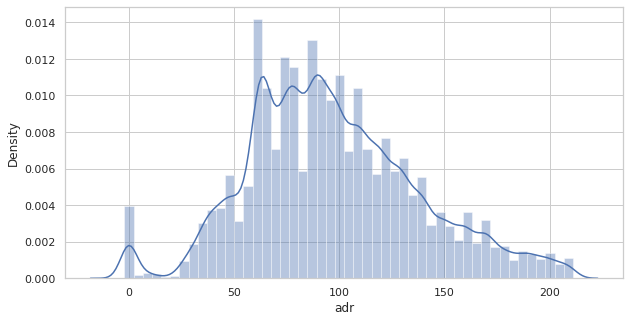

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.distplot(new_df2['adr'])

Most booked accomodation type


In [ ]:
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:

grouped_acc=new_df.groupby('reserved_room_type')
for acc, acc_df in grouped_acc:
  print(acc_df)




               hotel  is_canceled  ...  reservation_status  reservation_status_date
2       Resort Hotel            0  ...           Check-Out               2015-07-02
3       Resort Hotel            0  ...           Check-Out               2015-07-02
4       Resort Hotel            0  ...           Check-Out               2015-07-03
5       Resort Hotel            0  ...           Check-Out               2015-07-03
8       Resort Hotel            1  ...            Canceled               2015-05-06
...              ...          ...  ...                 ...                      ...
119383    City Hotel            0  ...           Check-Out               2017-09-06
119384    City Hotel            0  ...           Check-Out               2017-09-06
119385    City Hotel            0  ...           Check-Out               2017-09-06
119388    City Hotel            0  ...           Check-Out               2017-09-07
119389    City Hotel            0  ...           Check-Out               201

In [ ]:
grouped_acc_count=grouped_acc['reserved_room_type'].count()
grouped_acc_count




reserved_room_type
A    85994
B     1114
C      932
D    19201
E     6535
F     2897
G     2094
H      601
L        6
P       12
Name: reserved_room_type, dtype: int64

In [96]:
##Most booked accomodation type (version 2)
ind = new_df[new_df['is_canceled']==0][(new_df['adults']==1) & (new_df['children'] == 0) & (new_df['babies'] == 0)]
coup = new_df[new_df['is_canceled']==0][(new_df['adults']==2) & (new_df['children'] == 0) & (new_df['babies'] == 0)]
fam = new_df[new_df['is_canceled']==0][(new_df['adults'] )+ (new_df['children']) + (new_df['babies'] ) > 2]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [97]:
total_count = new_df[(new_df['is_canceled']==0)].shape[0]

In [98]:
percentage = [round(len(item)/total_count * 100) for item in [ind,coup,fam]]
percentage

[21, 65, 13]

In [99]:
types_of_acc = ['individual','couple','family']

In [100]:
dict(zip(types_of_acc,percentage))

{'couple': 65, 'family': 13, 'individual': 21}

In [ ]:
acc = pd.DataFrame({'types_of_acc':types_of_accomodation,'percentage':percentage})


In [102]:
family.groupby('arrival_date_month').count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
arrival_date_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
April,807,807,807,807,807,807,807,807,807,807,807,807,806,807,807,807,807,807,807,807,807,807,737,17,807,807,807,807,807,807,807
August,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2096,2102,2102,2102,2102,2102,2102,2102,2102,2102,1860,11,2102,2102,2102,2102,2102,2102,2102
December,534,534,534,534,534,534,534,534,534,534,534,534,532,534,534,534,534,534,534,534,534,534,459,8,534,534,534,534,534,534,534
February,628,628,628,628,628,628,628,628,628,628,628,628,626,628,628,628,628,628,628,628,628,628,564,15,628,628,628,628,628,628,628
January,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,282,4,331,331,331,331,331,331,331
July,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1841,1844,1844,1844,1844,1844,1844,1844,1844,1844,1701,5,1844,1844,1844,1844,1844,1844,1844
June,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,682,7,737,737,737,737,737,737,737
March,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,545,11,607,607,607,607,607,607,607
May,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,559,14,614,614,614,614,614,614,614


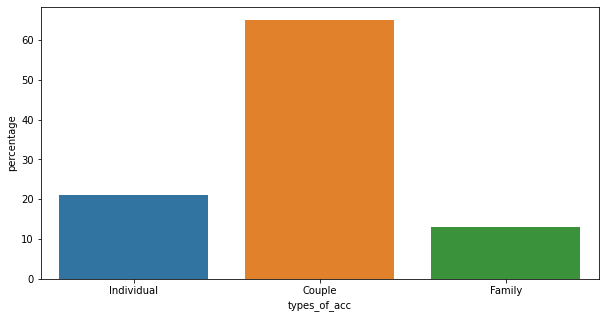

In [105]:
plt.figure(figsize=(10,5))                                                             # groupby on basis of type of hotels
ax = sns.barplot(x="types_of_acc", y="percentage", data = acc)

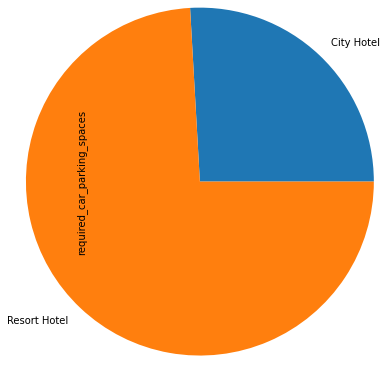

In [30]:
#Does parking have an impact on bookings for resort hotels?
new_df.groupby(['hotel'])['required_car_parking_spaces'].sum().plot.pie(radius = 2)
plt.show()


In [47]:
#Impact of deposit type on cancellation #####Check how to add condition####
deposit_cancel = df.groupby("deposit_type")["is_canceled"].describe()
deposit_cancel


,count,mean,std,min,25%,50%,75%,max
deposit_type,,,,,,,,
No Deposit,104641.0,0.283770,0.450829,0.0,0.0,0.0,1.0,1.0
Non Refund,14587.0,0.993624,0.079595,0.0,1.0,1.0,1.0,1.0
Refundable,162.0,0.222222,0.417029,0.0,0.0,0.0,0.0,1.0


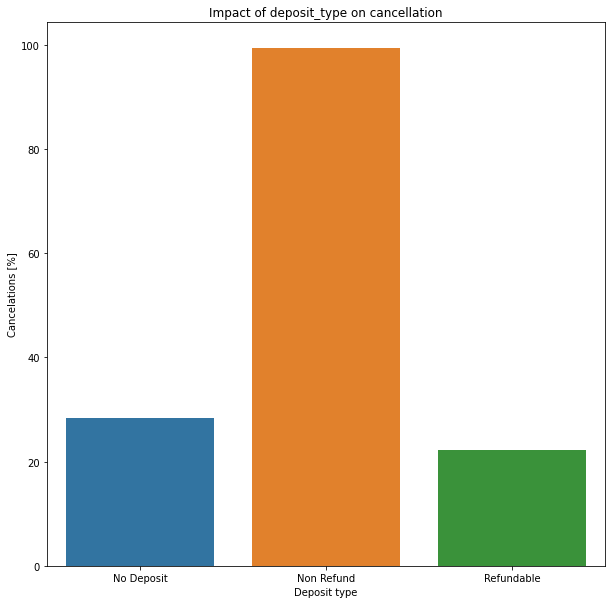

In [48]:
#show figure:
plt.figure(figsize=(10, 10))
sns.barplot(x=deposit_cancel.index, y=deposit_cancel["mean"] * 100)
plt.title("Impact of deposit_type on cancellation")
plt.xlabel("Deposit type")
plt.ylabel("Cancelations [%]")
plt.show()

In [66]:
segmentwise_breakup=new_df.market_segment.value_counts(normalize=True)*100
segmentwise_breakup

Online TA        47.305379
Offline TA/TO    20.286298
Groups           16.594073
Direct           10.558189
Corporate         4.435193
Complementary     0.622351
Aviation          0.198516
Name: market_segment, dtype: float64

Text(0.5, 1.0, 'Arriving year, Leadtime and Cancelations')

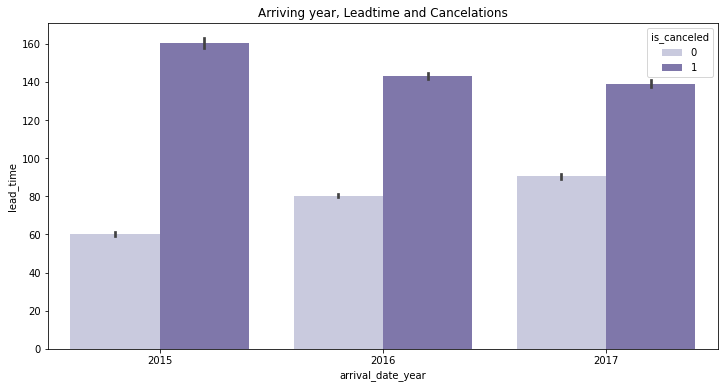

In [70]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= new_df, palette='Purples')
plt.title('Arriving year, Leadtime and Cancelations')

In [67]:
new_df.head(3)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [135]:
#How much do guests pay for a room per night?
ppp_df = no_cancel[['hotel','adults','children','assigned_room_type','arrival_date_month','arrival_date_year','adr']]
ppp_df

,hotel,adults,children,assigned_room_type,arrival_date_month,arrival_date_year,adr
0,Resort Hotel,2,0.0,C,July,2015,0.00
1,Resort Hotel,2,0.0,C,July,2015,0.00
2,Resort Hotel,1,0.0,C,July,2015,75.00
3,Resort Hotel,1,0.0,A,July,2015,75.00
4,Resort Hotel,2,0.0,A,July,2015,98.00
...,...,...,...,...,...,...,...
119385,City Hotel,2,0.0,A,August,2017,96.14
119386,City Hotel,3,0.0,E,August,2017,225.43
119387,City Hotel,2,0.0,D,August,2017,157.71
119388,City Hotel,2,0.0,A,August,2017,104.40


In [141]:
new_df1['adr_per_person'] = new_df1['adr']/(new_df1['adults'] + new_df1['children'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [142]:
new_df1.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_members,total_nights,adr_per_person
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,75.0


In [123]:
new_df.groupby(['hotel','assigned_room_type'])['adr_per_person'].mean().unstack()

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,P
hotel,,,,,,,,,,,,
City Hotel,inf,54.024902,64.229898,61.265604,74.004251,58.547557,inf,NaN,NaN,inf,NaN,NaN
Resort Hotel,46.278719,57.454708,46.676145,inf,56.869915,62.240974,54.705142,52.349578,45.952233,NaN,4.0,NaN


In [145]:
#Month have the highest number of cancelations
new_df[new_df['is_canceled'] == 1]['arrival_date_month'].value_counts()

August       5235
July         4742
May          4677
June         4535
April        4524
October      4246
September    4116
March        3149
February     2696
December     2371
November     2122
January      1807
Name: arrival_date_month, dtype: int64

Text(0, 0.5, 'number_of_cancelation')

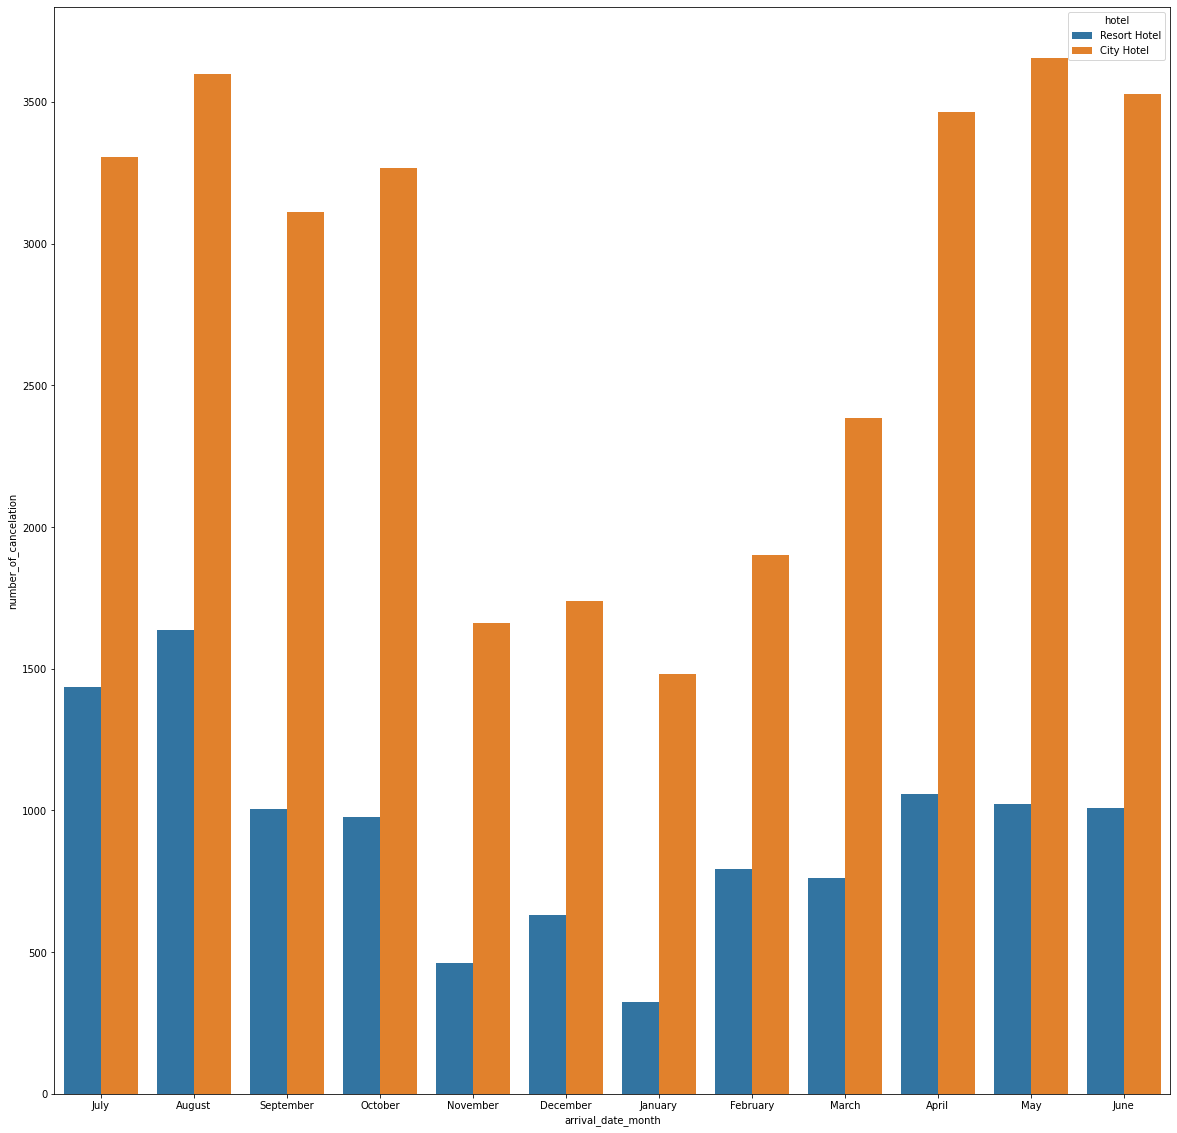

In [148]:
plt.figure(figsize = (20,20))
ax = sns.countplot(x = 'arrival_date_month',hue = 'hotel', data = new_df[new_df['is_canceled'] == 1])
ax.set_ylabel('number_of_cancelation')